# Data Analysis 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

from src.datasets import (
    YoloDataset, SkyFusionDataset, TrafficSignsDataset, FruitsDataset
)
from src.transforms import ImageTransforms, YoloBBox
from src.visualizations import ImageVisualizations

In [3]:
def dataset_intro(dataset: YoloDataset):
    print("Categories:", dataset.category_names)
    print(f"Dataset length: {len(dataset)}")

def plot_some_samples(dataset: YoloDataset):
    plots_range = range(12, 17)
    plots_range_len = len(plots_range)
    plt.figure(figsize=(15, 10))
    for idx, plot_idx in enumerate(plots_range, start=1):
        img, annots = dataset[plot_idx]
        
        img = ImageTransforms.postprocess(img)
        categories = [
            dataset.category_names[int(category_id)]
            for category_id in annots[:, 0]
        ]
        bboxes = list(map(YoloBBox.postprocess, annots[:, 1:5]))
            
        plt.subplot(1, plots_range_len, idx)
        plt.title(f"Data point {plot_idx}")
        ImageVisualizations.plot_image_with_annotations(img, bboxes, categories)
    plt.show()

## SkyFusion Data Analysis

In [4]:
ds = SkyFusionDataset(split="train")
dataset_intro(ds)

Categories: ['aircraft', 'ship', 'vehicle']
Dataset length: 2094


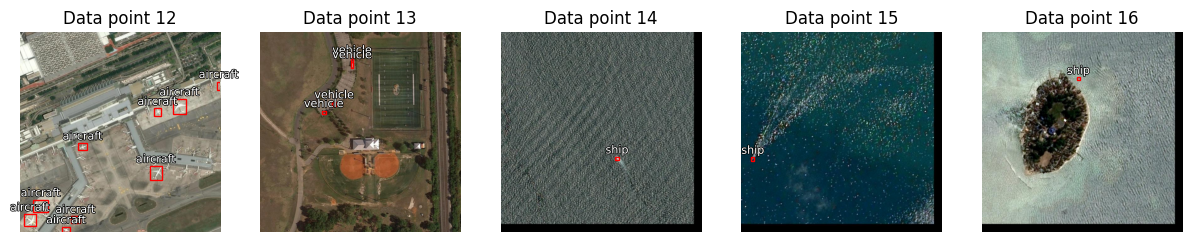

In [5]:
plot_some_samples(ds)

## Traffic Signs Data Analysis

In [6]:
ds = TrafficSignsDataset(split="train")
dataset_intro(ds)

Categories: ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110', 'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 'Speed Limit 80', 'Speed Limit 90', 'Stop']
Dataset length: 3530


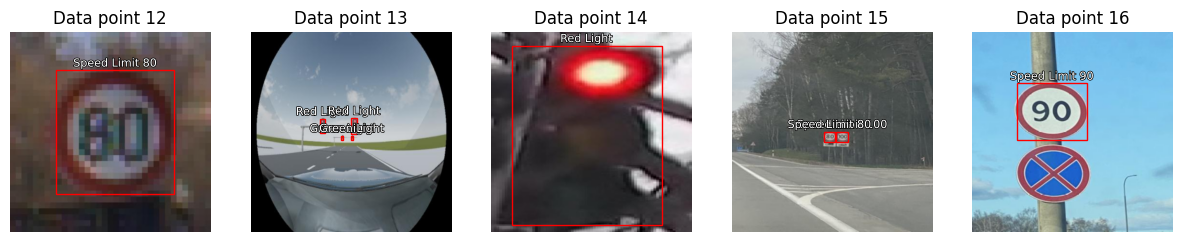

In [7]:
plot_some_samples(ds)

## Fruits Data Analysis

In [8]:
ds = FruitsDataset(split="train")
dataset_intro(ds)

Categories: ['Apple', 'Banana', 'Grape', 'Orange', 'Pineapple', 'Watermelon']
Dataset length: 7108


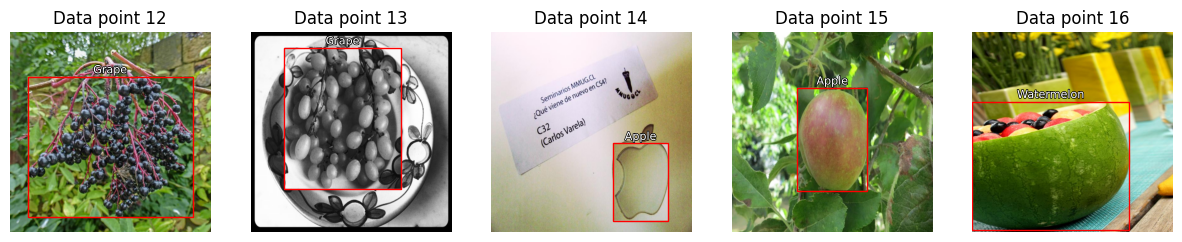

In [9]:
plot_some_samples(ds)